# LOGISTIC REGRESSION

**1. Sigmoid Function:**
$$ \sigma = \frac{1}{1+e^{-s}} $$

**2. Loss Function:**
$$ Log Loss = -y*log(\hat{y})-(1-y)log(1-\hat{y}) $$

$$ L(w) = -\frac{1}{N}logp(y|X;w) $$

$$ \Leftrightarrow L(w) =-\frac{1}{N}\sum_{i=1}^{N}(y_{i}log(z_{i})+(1-y_{i})log(1-z_{i})) $$

$$ with\  z_{i} = \sigma_{i}$$

**3. Optimizer:**
$$ L(w;x_{i};y_{i})=(y_{i}log(z_{i})+(1-y_{i})log(1-z_{i})) $$

$$ \bigtriangledown_{w}L(w;x_{i};y_{i})=(z_{i}-y_{i})x_{i} = 
(\sigma(wx_{i}) - y_{i})x_{i} $$

In [1]:
def sigmoid(S):
    return 1/(1 + np.exp(-S))

def LogR_loss(w, X, y, lam):
    z = sigmoid(X.dot(w))
    return -np.mean(y*np.log(z)+(1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]

def LogR_grad(w, X, y):
    z = sigmoid(X.dot(w))
    return (z-y).dot(X)

def LogR_MGD(w_init, X, y, lam=.0001, lr=0.05, n_epoches=2000, batch=5):
    N, d = X.shape[0], X.shape[1]
    w = w_init
    loss_hist = [LogR_loss(w_init, X, y, lam)]
    ep = 0
    while ep < n_epoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        X = X[mix_ids]
        y = y[mix_ids]
        for i in range(0, N, batch):
            X_i = X[i:i+batch]
            y_i = y[i:i+batch]
            w_new = w - lr*(LogR_grad(w, X_i, y_i) + lam*w)
        if np.linalg.norm(w_new - w) < 1e-6:
            break
        w = w_new
        loss_hist.append(LogR_loss(w, X, y, lam))
    return w, loss_hist
    

## 1.Create dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

def mkdir_if_not_exist(path):
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
X0 = np.array([[0.5, 1.5, 0.75, 1.75, 2.5, 3.5, 1.0, 1.25, 2.0, 3.0]])
X1 = np.array([[2.25, 3.25, 4.5, 4.75, 1.75, 2.75, 4.0, 5.0, 4.25, 5.5]])

X = np.concatenate((X0, X1), axis = 1)
y = np.asarray([0]*X0.size + [1]*X1.size)

X, y
data_file = '../data/LogR1.csv'
mkdir_if_not_exist('../data')
with open (data_file, 'w') as f:
    f.write('Hours,Pass\n')
    for i in range(X.size):
        str0 = '{},{}\n'.format(X[0][i], y[i])
        f.write(str0)

## 2. Load dataset

In [4]:
import pandas as pd

data_file = '../data/LogR1.csv'
data = pd.read_csv(data_file)
inputs ,outputs = data.iloc[:, 0:1], data.iloc[:, -1]
X, y = np.array(inputs.values), np.array(outputs.values)
data

,Hours,Pass
0,0.50,0
1,1.50,0
2,0.75,0
3,1.75,0
4,2.50,0
5,3.50,0
6,1.00,0
7,1.25,0
8,2.00,0
9,3.00,0


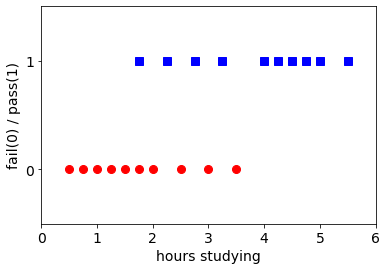

In [5]:
y0 = np.asarray([0]*X0.size)
y1 = np.asarray([1]*X1.size)

plt.plot(X0.T, y0, 'ro', markersize = 8)
plt.plot(X1.T, y1, 'bs', markersize = 8)

plt.axis([0, 6, -.5, 1.5])
cur_axes = plt.gca()
plt.xlabel('hours studying', fontsize = 14)
plt.ylabel('fail(0) / pass(1)', fontsize = 14)
cur_axes.axes.get_yaxis().set_ticks([0, 1])
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## 3. Apply 

In [6]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w1, loss_hist1 = LogR_MGD(w_init, Xbar, y, lam, lr = 0.05, n_epoches=1000)
w1

array([-4.07593987,  1.73602926])

## Loss:

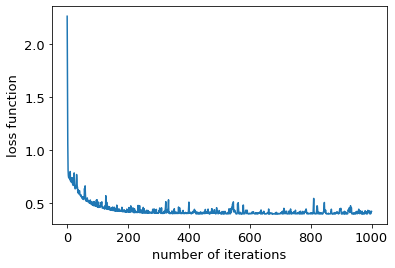

In [7]:
plt.plot(loss_hist1)
plt.xlabel('number of iterations', fontsize = 13)
plt.ylabel('loss function', fontsize = 13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

## 4. Solution by sklearn

In [8]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(C = 2/lam)
model.fit(X, y)

w2 = np.array([model.intercept_[0], model.coef_[0][0]])
print(w2)
print(LogR_loss(w2, Xbar, y, lam))

[-4.07763981  1.50461548]
0.4014964232753916


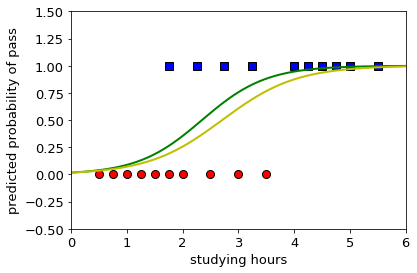

In [9]:
plt.plot(X0.T, y0, 'ro', markersize = 8, markeredgecolor = 'k')
plt.plot(X1.T, y1, 'bs', markersize = 8, markeredgecolor = 'k')

x_0 = np.linspace(0, 6, 1000)
y_1 = sigmoid(w1[0] + w1[1]*x_0)
y_2 = sigmoid(w2[0] + w2[1]*x_0)

plt.plot(x_0, y_1, 'g-', linewidth = 2)
plt.plot(x_0, y_2, 'y-', linewidth = 2)

plt.xlabel('studying hours', fontsize = 13)
plt.ylabel('predicted probability of pass', fontsize = 13)
plt.axis([0, 6, -.5, 1.5])
plt.tick_params(axis='both', which='major', labelsize=13)

plt.show()